In [55]:
import matplotlib.pyplot as plt
import subprocess
import re
result = subprocess.run(['openssl', 'speed', 'rsa'], capture_output=True, text=True)

In [61]:
output = result.stdout
data = {}

In [68]:
output

'version: 3.1.0\nbuilt on: Wed Mar 15 07:30:33 2023 UTC\noptions: bn(64,64)\ncompiler: gcc -m64 -Wall -O3 -DL_ENDIAN -DOPENSSL_PIC -DUNICODE -D_UNICODE -DWIN32_LEAN_AND_MEAN -D_MT -DOPENSSL_BUILDING_OPENSSL -DZLIB -DZLIB_SHARED -DNDEBUG -DOPENSSLBIN="\\"/mingw64/bin\\""\nCPUINFO: OPENSSL_ia32cap=0x7ed8320b078bffff:0x40068c219c97a9\n                  sign    verify    sign/s verify/s\nrsa  512 bits 0.000031s 0.000002s  32231.8 541707.0\nrsa 1024 bits 0.000068s 0.000004s  14697.2 232457.5\nrsa 2048 bits 0.000463s 0.000013s   2160.0  75011.7\nrsa 3072 bits 0.001409s 0.000028s    709.8  35426.6\nrsa 4096 bits 0.003148s 0.000048s    317.7  20776.1\nrsa 7680 bits 0.027991s 0.000164s     35.7   6087.7\nrsa 15360 bits 0.149021s 0.000639s      6.7   1564.6\n'

In [62]:
regex = re.compile(r'rsa\s+(\d+)\s+bits\s+[\d\.]+s\s+[\d\.]+s\s+([\d\.]+)\s+([\d\.]+)')

In [63]:
for match in regex.finditer(output):
    key_size = match.group(1)  # RSA key size (e.g., 512, 1024, 2048, etc.)
    sign_per_sec = float(match.group(2))  # Signatures per second
    verify_per_sec = float(match.group(3))  # Verifications per second

In [64]:
data[key_size] = (sign_per_sec, verify_per_sec)  # Store as a tuple (sign, verify)

In [65]:
def plot(data, title, xlabel, ylabel):
    for key_size, throughput in data.items():
        plt.plot(throughput, label=f'{key_size}-bit')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{title}.png")

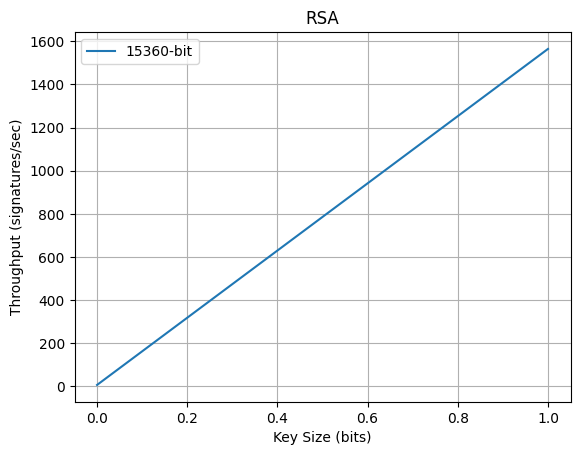

In [67]:
plot(data, "RSA", "Key Size (bits)", "Throughput (signatures/sec)")